### Problem 1
**(a) Show that:**
$$
\hat{\beta_1}
= \frac{\sum_{i=1}^n x_i y_i - \frac{1}{n}\left( \sum_{i=1}^n x_i \right)\left( \sum_{i=1}^n y_i \right)}{\sum_{i=1}^n (x_i)^2 - \frac{1}{n}\left( \sum_{i=1}^n x_i \right)^2}
= \frac{\sum_{i=1}^n x_i y_i - n \bar{x} \bar{y}}{\sum_{i=1}^n (x_i)^2 - n \bar{x}^2}
$$
**and**
$$
\hat{\beta_0}
= \frac{1}{n} \sum_{i=1}^n y_i - \hat{\beta_1} \frac{1}{n} \sum_{i=1}^n x_i
= \bar{y} - \hat{\beta_1} \bar{x}
$$

First, we will prove the equality for $\hat{\beta_1}$:
$$
\hat{\beta_1}
= \frac{\sum_{i=1}^n x_i y_i - \frac{1}{n}\left( \sum_{i=1}^n x_i \right)\left( \sum_{i=1}^n y_i \right)}{\sum_{i=1}^n (x_i)^2 - \frac{1}{n}\left( \sum_{i=1}^n x_i \right)^2}
= \frac{\sum_{i=1}^n x_i y_i - \frac{1}{n}\left( \sum_{i=1}^n x_i \right)\left( \sum_{i=1}^n y_i \right)}{\sum_{i=1}^n (x_i)^2 - \frac{1}{n}\left( \sum_{i=1}^n x_i \right)^2}
\cdot \frac{n \cdot \frac{1}{n}}{n \cdot \frac{1}{n}}
$$
$$
= \frac{\sum_{i=1}^n x_i y_i - n \cdot \frac{1}{n}\left( \sum_{i=1}^n x_i \right) \frac{1}{n} \left( \sum_{i=1}^n y_i \right)}{\sum_{i=1}^n (x_i)^2 - n \cdot \left( \frac{1}{n} \right)^2 \left( \sum_{i=1}^n x_i \right)^2}
= \frac{\sum_{i=1}^n x_i y_i - n \bar{x} \bar{y}}{\sum_{i=1}^n (x_i)^2 - n \bar{x}^2}
$$

For $\hat{\beta_0},$
$$
\hat{\beta_0}
= \frac{1}{n} \sum_{i=1}^n y_i - \hat{\beta_1} \frac{1}{n} \sum_{i=1}^n x_i
= \bar{y} - \hat{\beta_1} \bar{x}
$$


**(b)**

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

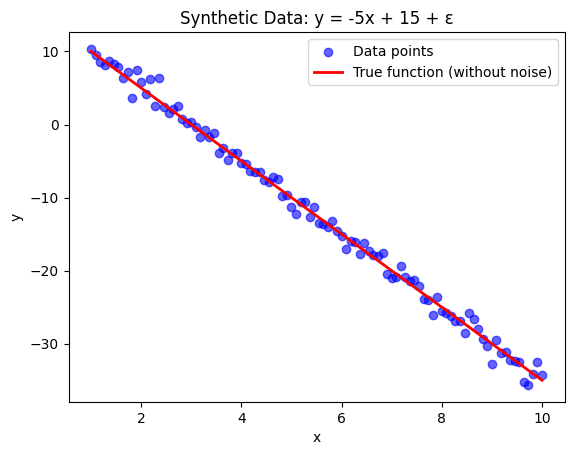

In [ ]:
# Parameters
n = 100  # number of data points
x = np.linspace(1, 10, n)  # evenly spaced values between 1 and 10
epsilon = np.random.normal(0, 1, n)  # noise ~ N(0, 1)

# Linear relationship with noise
y = -5 * x + 15 + epsilon

# Plot (for demonstration purposes)
plt.scatter(x, y, color='blue', alpha=0.6, label='Data points')
plt.plot(x, -5 * x + 15, color='red', linewidth=2, label='True function (without noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data: y = -5x + 15 + ε')
plt.legend()
plt.show()

**(c)**

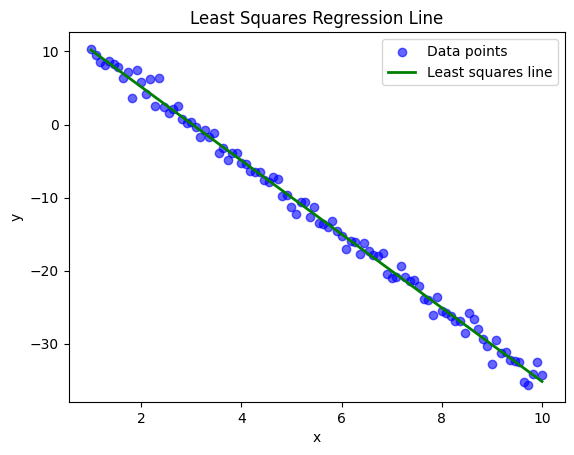

Intercept (β0_hat): 15.2342
Slope (β1_hat): -5.0401
Sum of Squared Residuals (SSR): 98.1531


In [3]:
# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate slope (beta1_hat) and intercept (beta0_hat)
beta1_hat = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
beta0_hat = y_mean - beta1_hat * x_mean

# Predicted values
y_hat = beta0_hat + beta1_hat * x

# Residuals and sum of squared residuals
residuals = y - y_hat
SSR = np.sum(residuals ** 2)

# Plot results
plt.scatter(x, y, color='blue', alpha=0.6, label='Data points')
plt.plot(x, y_hat, color='green', linewidth=2, label='Least squares line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Regression Line')
plt.legend()
plt.show()

(beta0_hat, beta1_hat, SSR)

# Print the results in a clear format
print(f"Intercept (β0_hat): {beta0_hat:.4f}")
print(f"Slope (β1_hat): {beta1_hat:.4f}")
print(f"Sum of Squared Residuals (SSR): {SSR:.4f}")

**(d)**

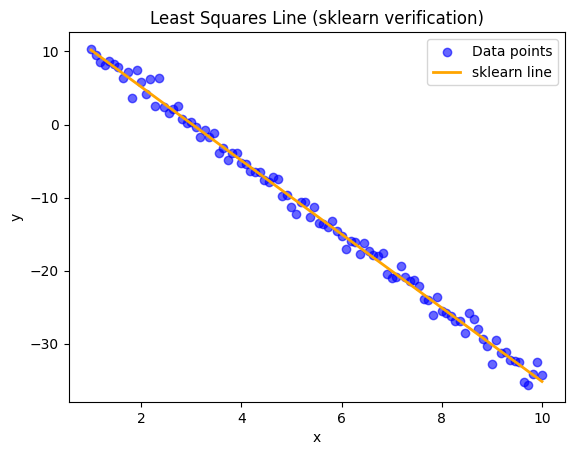

Intercept (β0) [sklearn]: 15.2342
Slope (β1) [sklearn]: -5.0401
Sum of Squared Residuals (SSR) [sklearn]: 98.1531


In [4]:
# Reshape x for sklearn (expects 2D array)
x_reshaped = x.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Extract coefficients
beta0_sklearn = model.intercept_
beta1_sklearn = model.coef_[0]

# Predictions and SSR
y_pred_sklearn = model.predict(x_reshaped)
SSR_sklearn = np.sum((y - y_pred_sklearn) ** 2)

# Plot to compare
plt.scatter(x, y, color='blue', alpha=0.6, label='Data points')
plt.plot(x, y_pred_sklearn, color='orange', linewidth=2, label='sklearn line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Line (sklearn verification)')
plt.legend()
plt.show()

print(f"Intercept (β0) [sklearn]: {beta0_sklearn:.4f}")
print(f"Slope (β1) [sklearn]: {beta1_sklearn:.4f}")
print(f"Sum of Squared Residuals (SSR) [sklearn]: {SSR_sklearn:.4f}")

### Problem 2
**(a)**

In [5]:
# imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

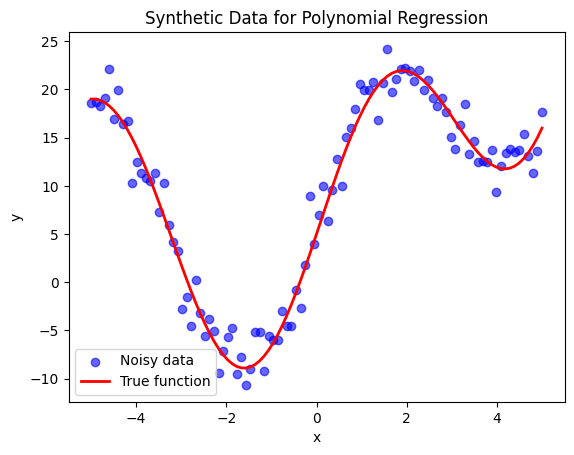

In [6]:
# Parameters
n = 100
x_poly = np.linspace(-5, 5, n)
true_y_poly = 12 * np.sin(x_poly) + 0.5 * x_poly**2 + 2 * x_poly + 5
y_poly = true_y_poly + np.random.normal(0, 2, n)  # noisy data

# Plot true function and noisy data
plt.scatter(x_poly, y_poly, color='blue', alpha=0.6, label='Noisy data')
plt.plot(x_poly, true_y_poly, color='red', linewidth=2, label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data for Polynomial Regression')
plt.legend()
plt.show()

**(b)**

In [7]:
# Pipeline
poly_reg_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=5, include_bias=False)),
    ('lin_reg', LinearRegression())
])

**(c)**

In [8]:
# Reshape x for sklearn (expects 2D array)
x_poly_reshaped = x_poly.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x_poly_reshaped, y_poly, test_size=0.2, random_state=42)

# Train model
poly_reg_model.fit(X_train, y_train)

# Predictions on test set
y_test_pred = poly_reg_model.predict(X_test)

# Mean squared test error
mse_test = mean_squared_error(y_test, y_test_pred)

# Get coefficients and intercept from trained model
coefficients = poly_reg_model.named_steps['lin_reg'].coef_
intercept = poly_reg_model.named_steps['lin_reg'].intercept_

# Print model equation and MSE
print("Polynomial Regression Model (degree=5):")
print(f"Intercept: {intercept:.4f}")
print("Coefficients:")
for i, coef in enumerate(coefficients, start=1):
    print(f"  x^{i}: {coef:.4f}")

print(f"\nMean Squared Error (Test Set): {mse_test:.4f}")

Polynomial Regression Model (degree=5):
Intercept: 5.5392
Coefficients:
  x^1: 12.3679
  x^2: 0.4497
  x^3: -1.3515
  x^4: 0.0010
  x^5: 0.0347

Mean Squared Error (Test Set): 4.7088


**(e)**

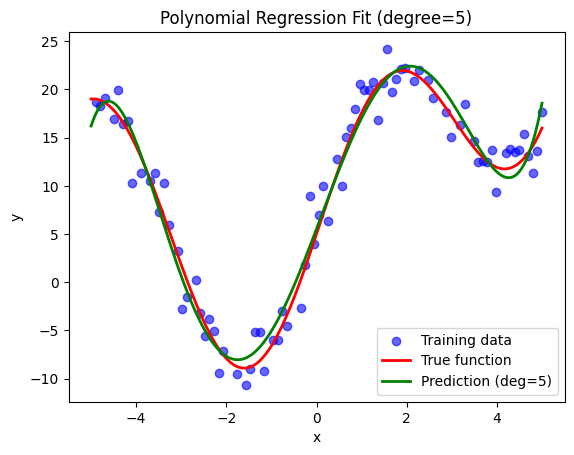

In [9]:
# Plotting
x_plot = np.linspace(-5, 5, 200).reshape(-1, 1)
y_plot_true = 12 * np.sin(x_plot) + 0.5 * x_plot**2 + 2 * x_plot + 5
y_plot_pred = poly_reg_model.predict(x_plot)

# Plot training data and predictions
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training data')
plt.plot(x_plot, y_plot_true, color='red', linewidth=2, label='True function')
plt.plot(x_plot, y_plot_pred, color='green', linewidth=2, label='Prediction (deg=5)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit (degree=5)')
plt.legend()
plt.show()

### Problem 3
**(a)**

In [10]:
# imports
from sklearn.model_selection import GridSearchCV

In [11]:
# Pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])

**(b)**

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(x_poly_reshaped, y_poly, test_size=0.2, random_state=42)

# Define parameter grid for polynomial degrees (try degree 1 through 10)
param_grid = {'poly_features__degree': list(range(1, 11))}

# GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model and parameters
best_degree = grid_search.best_params_['poly_features__degree']
best_model = grid_search.best_estimator_

# Predictions and test MSE for best model
y_test_pred_best = best_model.predict(X_test)
mse_test_best = mean_squared_error(y_test, y_test_pred_best)

print(f"Best polynomial degree: {best_degree}")
print(f"Mean Squared Error (Test Set): {mse_test_best:.4f}")

Best polynomial degree: 7
Mean Squared Error (Test Set): 3.7280


**(c)**

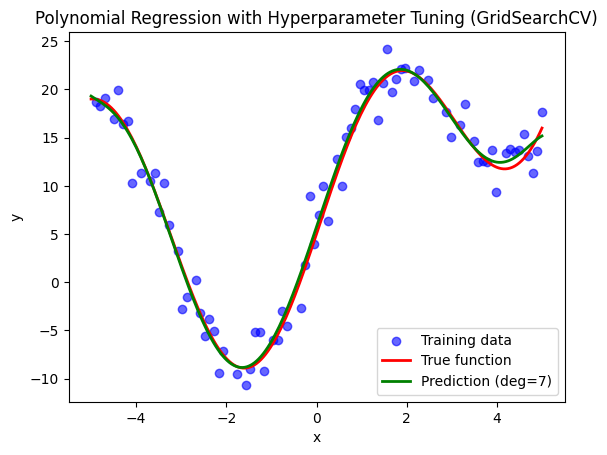

In [13]:
# Plotting
x_plot = np.linspace(-5, 5, 200).reshape(-1, 1)
y_plot_true = 12 * np.sin(x_plot) + 0.5 * x_plot**2 + 2 * x_plot + 5
y_plot_pred_best = best_model.predict(x_plot)

# Plot training data and predictions
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training data')
plt.plot(x_plot, y_plot_true, color='red', linewidth=2, label='True function')
plt.plot(x_plot, y_plot_pred_best, color='green', linewidth=2, label=f'Prediction (deg={best_degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Hyperparameter Tuning (GridSearchCV)')
plt.legend()
plt.show()

### Problem 4
**(a)**

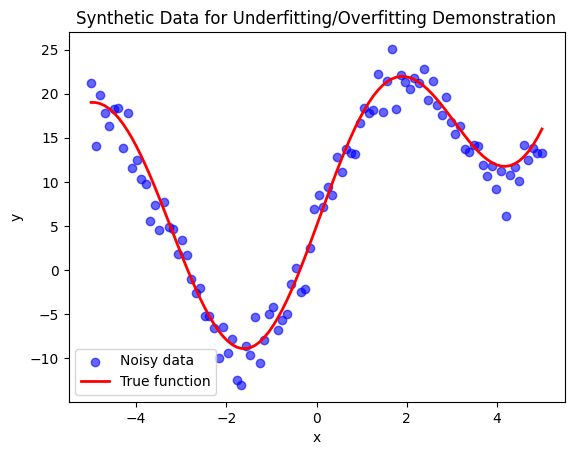

In [14]:
# Create dataset
n = 100
x_poly4 = np.linspace(-5, 5, n)
true_y_poly4 = 12 * np.sin(x_poly4) + 0.5 * x_poly4**2 + 2 * x_poly4 + 5
y_poly4 = true_y_poly4 + np.random.normal(0, 2, n)  # noisy data
x_poly4_reshaped = x_poly4.reshape(-1, 1)

# Plot noisy data vs true function
plt.scatter(x_poly4, y_poly4, color='blue', alpha=0.6, label='Noisy data')
plt.plot(x_poly4, true_y_poly4, color='red', linewidth=2, label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data for Underfitting/Overfitting Demonstration')
plt.legend()
plt.show()

**(b)**

In [15]:
# Pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])

**(c)**

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    x_poly4_reshaped, y_poly4, test_size=0.2, random_state=42
)

**(d)**

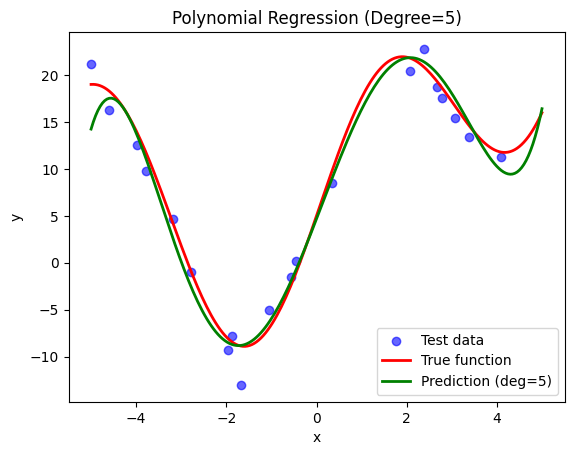

In [17]:
# === Polynomial Regression (degree = 5) ===
degree = 5
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('lin_reg', LinearRegression())
])

pipeline.fit(X_train, y_train)

# Predictions
x_plot = np.linspace(-5, 5, 200).reshape(-1, 1)
y_plot_true = 12 * np.sin(x_plot) + 0.5 * x_plot**2 + 2 * x_plot + 5
y_plot_pred = pipeline.predict(x_plot)

# Plot prediction curve vs true function
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Test data')
plt.plot(x_plot, y_plot_true, color='red', linewidth=2, label='True function')
plt.plot(x_plot, y_plot_pred, color='green', linewidth=2, label=f'Prediction (deg={degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Polynomial Regression (Degree={degree})')
plt.legend()
plt.show()

**(e)**

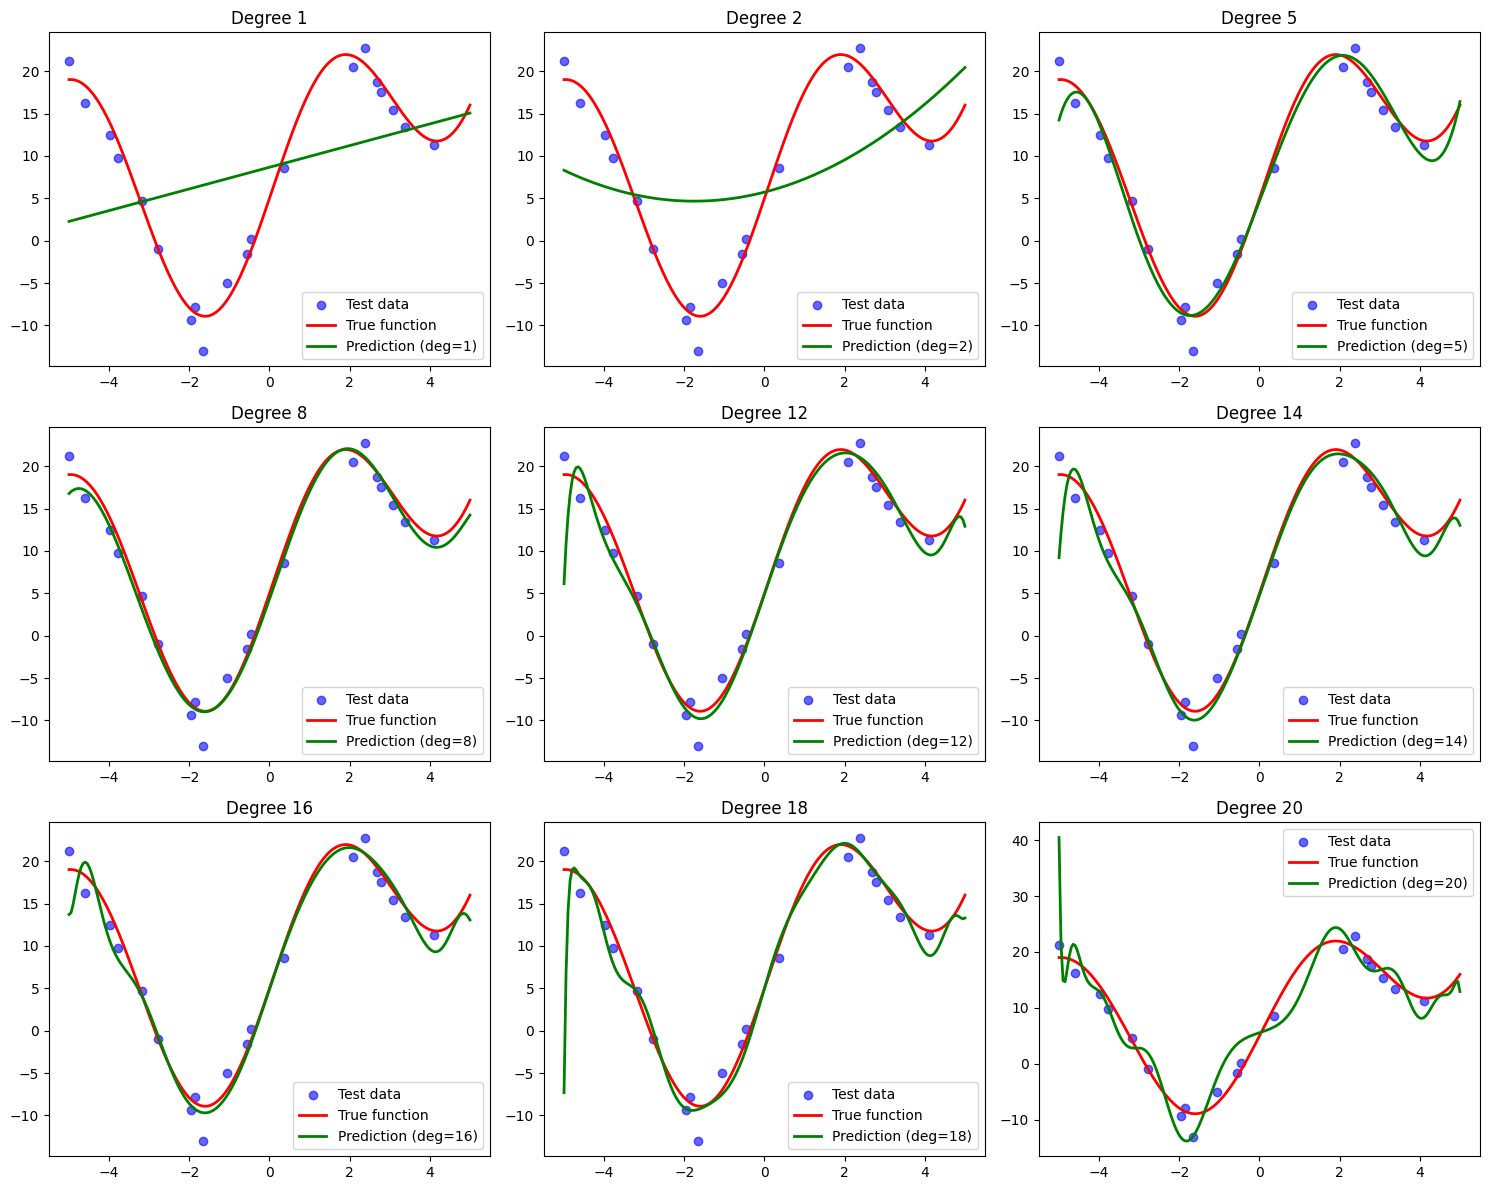

In [18]:
degrees = [1, 2, 5, 8, 12, 14, 16, 18, 20]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, degree in enumerate(degrees):
    pipeline.set_params(poly_features__degree=degree)
    pipeline.fit(X_train, y_train)

    # Predictions
    y_plot_pred = pipeline.predict(x_plot)

    # Plot
    ax = axes[i]
    ax.scatter(X_test, y_test, color='blue', alpha=0.6, label='Test data')
    ax.plot(x_plot, y_plot_true, color='red', linewidth=2, label='True function')
    ax.plot(x_plot, y_plot_pred, color='green', linewidth=2, label=f'Prediction (deg={degree})')
    ax.set_title(f"Degree {degree}")
    ax.legend()

plt.tight_layout()
plt.show()

**(f)**

Observing the plots, it appears degrees 5 and 8 give similar fits. Although I would like to observe some error metric (ex. MSE), I believe degree 5-8 is likely most optimal as it has the lowest degree, meaning is the most likely to avoid overfitting.

**(e)**

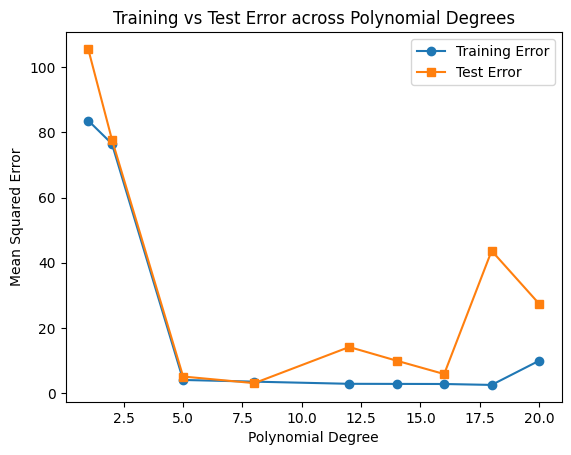

Degree 1: Train MSE=83.6626, Test MSE=105.6505
Degree 2: Train MSE=76.5135, Test MSE=77.8170
Degree 5: Train MSE=3.9919, Test MSE=5.0458
Degree 8: Train MSE=3.4725, Test MSE=3.0136
Degree 12: Train MSE=2.8079, Test MSE=14.1094
Degree 14: Train MSE=2.7795, Test MSE=9.9005
Degree 16: Train MSE=2.7518, Test MSE=5.8068
Degree 18: Train MSE=2.4675, Test MSE=43.6577
Degree 20: Train MSE=9.8996, Test MSE=27.3964


In [19]:
# Degrees to evaluate
degrees = [1, 2, 5, 8, 12, 14, 16, 18, 20]

train_errors = []
test_errors = []

for degree in degrees:
    # Update polynomial degree
    pipeline.set_params(poly_features__degree=degree)
    pipeline.fit(X_train, y_train)
    
    # Predictions on train and test sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot errors vs degrees
plt.plot(degrees, train_errors, marker='o', label='Training Error')
plt.plot(degrees, test_errors, marker='s', label='Test Error')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Test Error across Polynomial Degrees")
plt.legend()
plt.show()

# Print results
for d, tr, te in zip(degrees, train_errors, test_errors):
    print(f"Degree {d}: Train MSE={tr:.4f}, Test MSE={te:.4f}")

Question: What do you mean by "verify your observation in c"?

Underfitting is when a model is too simple to capture the underlying patterns in the data, causing it to perform poorly on both the training set and unseen test data.

Overfitting is when a model fits the training data too well. This makes it break under test data or real-world data because it has essentially memorized noise and specific patterns from the training set rather than learning the underlying general relationships. As a result, the model fails to generalize, leading to poor performance when faced with new or unseen inputs.

For this model, a polynomial of degree 5-8 would likely be best as they fit our data well and have low error.